# Proyek Analisis Data: Air Quality
- **Nama:** Herlan Jaelani
- **Email:** herlanjaelani1507@gmail.com
- **ID Dicoding:** herlanjae

## Menentukan Pertanyaan Bisnis

- Stasiun mana yang memiliki rata-rata kualitas udara terburuk dan terbaik?
- Bagaimana tren kualitas udara dari tahun ke tahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Data Wrangling

### Gathering Data

In [2]:
# Memuat dataset
data_1 = pd.read_csv('data/PRSA_Data_Aotizhongxin_20130301-20170228.csv', delimiter=',')
data_2 = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv', delimiter=',')
data_3 = pd.read_csv('data/PRSA_Data_Dingling_20130301-20170228.csv', delimiter=',')
data_4 = pd.read_csv('data/PRSA_Data_Dongsi_20130301-20170228.csv', delimiter=',')
data_5 = pd.read_csv('data/PRSA_Data_Guanyuan_20130301-20170228.csv', delimiter=',')
data_6 = pd.read_csv('data/PRSA_Data_Gucheng_20130301-20170228.csv', delimiter=',')
data_7 = pd.read_csv('data/PRSA_Data_Huairou_20130301-20170228.csv', delimiter=',')
data_8 = pd.read_csv('data/PRSA_Data_Nongzhanguan_20130301-20170228.csv', delimiter=',')
data_9 = pd.read_csv('data/PRSA_Data_Shunyi_20130301-20170228.csv', delimiter=',')
data_10 = pd.read_csv('data/PRSA_Data_Tiantan_20130301-20170228.csv', delimiter=',')
data_11 = pd.read_csv('data/PRSA_Data_Wanliu_20130301-20170228.csv', delimiter=',')
data_12 = pd.read_csv('data/PRSA_Data_Wanshouxigong_20130301-20170228.csv', delimiter=',')

# List yang menampung semua dataset
frames = [data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9, data_10, data_11, data_12]

# Menggabungkan semua dataset menjadi satu
new_data_df = pd.concat(frames, ignore_index=True)

# Menampilkan dataset yang telah digabungkan
print("Jumlah baris data: ", len(new_data_df))
print(new_data_df.info())

Jumlah baris data:  420768
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None


**Insight:**

Pada tahap _Gathering Data_, memuat semua dataset yang diberikan untuk dilakukan analisa.

- Dataset yang digunakan merupakan dataset bertipe .csv terkait kualitas udara dari stasiun yang berada di kota Beijing.
- Dataset-dataset tersebut adalah stasiun Aotizhongxin, Changping, Dingling, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, Wanshouxigong.
- 12 file csv dataset tersebut digabungkan ke dalam 1 DataFrame yang hasilnya memiliki:
    - **420.768** total baris
    - **18** kolom
    - **57.8+** MB ukuran akhir file
    

### Assessing Data

Jumlah missing values: 
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


Jumlah duplicated data:  0


Ringkasan statistik data numerik: 
                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000    

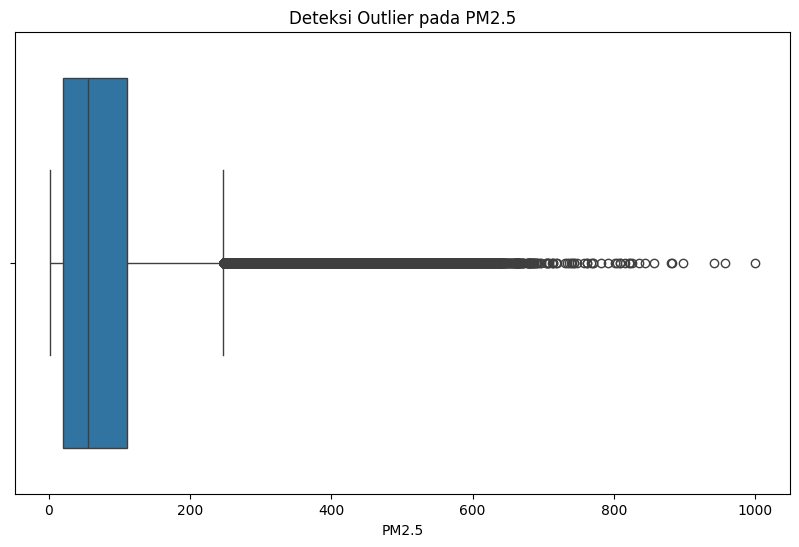

In [3]:
# Memeriksan missing values
print("Jumlah missing values: ")
print(new_data_df.isnull().sum())
print("\n")

# Memeriksa duplicated data
duplicated = new_data_df.duplicated().sum()
print("Jumlah duplicated data: ", duplicated)
print("\n")

# Memeriksa invalid dan inaccurate values
print("Ringkasan statistik data numerik: ")
print(new_data_df.describe())
print("\n")

# Memeriksa inconsistent value pada data kategorikal
print(new_data_df['station'].unique())
print(new_data_df['wd'].unique())
print("\n")

# Memeriksa outlier pada PM2.5
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_data_df['PM2.5'])
plt.title('Deteksi Outlier pada PM2.5')
plt.show()

**Insight:**

Pada tahap _assesing data_, dilakukan beberapa proses yang dilakukan untuk mengidentifikasi masalah data guna memastikan terjaganya kualitas data.

- Hampir semua kolom memiliki data yang hilang (_missing values_). Data-data yang tidak memiliki _missing values_ adalah:
    - No (nomor)
    - year (tahun)
    - month (bulan)
    - day (hari)
    - hour (jam)
- Kolom **PM2.5** merupakan variabel utama, maka untuk solusi untuk baris dengan data yang hilang tidak akan dihapus, melainkan akan menggunakan metode **imputasi**.
- Kolom **CO** memiliki **20.701** data yang hilang. Hampir **5%** dari keseluruhan data.
- Kolom **wd** memiliki **1.822** data **nan** atau hilang.
- Kolom lain seperti **TEMP, PRES, RAIN, WSDM** cenderung lengkap karena hanya kehilangan **~300-an** data.
- Dalam dataset ini **TIDAK MEMILIKI** data atau baris yang terduplikat.
- Dalam ringkasan statistik untuk data numerik, nilai **max** pada kolom **PM2.5, PM10,** dan **CO**, angka **999.0** biasanya merupakan batas atas, sehingga bisa jadi memang terjadi polusi yang cukup ekstrem.
- Pada kolom **PM2.5**, nilai **75%** ada di angka **111**, tetapi maksimumnya **999**. Jarak data yang cukup jauh sehingga mengonfirmasi adanya _outlier_ yang ekstrem.

### Cleaning Data

In [4]:
# Menangani missing values pada kolom numerik
cols_numeric = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 
                'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for col in cols_numeric:
    new_data_df[col] = new_data_df[col].interpolate(method='linear')

# Menangani missing values pada kolom kategorikal
new_data_df['wd'] = new_data_df['wd'].ffill()

# Membuat kolom datetime
new_data_df['datetime'] = pd.to_datetime(new_data_df[['year', 'month', 'day', 'hour']])

# Menampilkan hasil cleaning
print("Missing values:", new_data_df.isnull().sum().sum())
print("\nTipe data baru:")
print(new_data_df.info())

# Menyimpan data yang sudah dibersihkan
new_data_df.to_csv('dashboard/main_data.csv', index=False)

Missing values: 0

Tipe data baru:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     420768 non-null  float64       
 6   PM10      420768 non-null  float64       
 7   SO2       420768 non-null  float64       
 8   NO2       420768 non-null  float64       
 9   CO        420768 non-null  float64       
 10  O3        420768 non-null  float64       
 11  TEMP      420768 non-null  float64       
 12  PRES      420768 non-null  float64       
 13  DEWP      420768 non-null  float64       
 14  RAIN      420768 non-null  float64       
 15  wd        420768 non-null  object        
 16  WSP

**Insight:**

Pada tahap _cleaning data_, dilakukan untuk mengatasi masalah-masalah pada dataset yang teridentifikasi pada tahap sebelumnya.

- Metode imputasi yang digunakan untuk mengisi _missing values_ pada data-data numerik adalah **interpolation(method='linier')**. Metode ini memungkinkan menarik garis lurus antara 2 data (misal 20 dan 30), sehingga estimasi yang secara gradasi lebih halus dibandingkan dengan menghitung rata-rata (**mean**).
- Metode imputasi yang digunakan untuk mengisi _missing values_ pada data-data kategorikal adalah **ffill()**, yang menggunakan data jam sebelumnya untuk memprediksi data pada jam saat ini.
- Data waktu (**year, month, day, hour**), ditransformasi menjadi 1: **datetime**. Hal ini dilakukan supaya mudah digunakan saat divisualisasikan. Jadi, sumbu X bisa secara otomatis mengenali urutan waktu.
- Data yang telah dibersihkan disimpan menjadi file **main_data.csv** yang nantinya digunakan untuk visualisasi dalam bentuk dashboard menggunakan streamlit.

## Exploratory Data Analysis (EDA)

### Eksplorasi data untuk menjawab pertanyaan yang diajukan sebelumnya

In [6]:
# Pertanyaan pertama
# Agregasi spasial per stasiun
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2']
station_stats = new_data_df.groupby('station')[pollutants].mean().sort_values(by='PM2.5', ascending=False)
print("Rata-rata Polusi per Stasiun:\n")
print(station_stats)

# Pertanyaan kedua
# Agregasi temporal tahunan
new_data_df['year_num'] = new_data_df['datetime'].dt.year
yearly_stats = new_data_df.groupby('year_num')[['PM2.5', 'PM10', 'SO2', 'NO2']].mean().reset_index()
print("\nRata-rata Polusi Tahunan (2013-2017):\n")
print(yearly_stats)


Rata-rata Polusi per Stasiun:

                   PM2.5        PM10        SO2        NO2
station                                                   
Dongsi         86.144243  110.347617  18.506142  53.953078
Nongzhanguan   85.079472  109.384022  18.760102  58.095053
Wanshouxigong  85.067548  112.505795  17.363354  55.495402
Gucheng        84.074802  119.261567  15.705821  55.836004
Wanliu         83.467612  110.707858  18.409514  65.668418
Guanyuan       82.897522  109.372349  17.609312  58.139298
Aotizhongxin   82.540623  110.210033  17.459251  59.074106
Tiantan        82.033097  106.537076  14.510018  53.258828
Shunyi         79.437962   99.271936  13.445971  44.094695
Changping      70.986438   94.788575  14.943066  44.206153
Huairou        69.501747   92.422670  12.446681  32.077275
Dingling       66.845557   84.113713  11.797849  27.304331

Rata-rata Polusi Tahunan (2013-2017):

   year_num      PM2.5        PM10        SO2        NO2
0      2013  79.768553  103.199397  19.998777 

**Insight:**

Pada tahap ini dilakukan proses analisis pada data yang telah dibersihkan.

- Analisis pertama adalah menghitung rata-rata polutan per stasiun menggunakan data 4 polutan utama: **PM2.5, PM10, SO2, NO2**, kemudian diurutkan berdasarkan nilai PM2.5 tertinggi.
- Dari hasil yang diperoleh, memperlihatkan **Dongsi, Nongzhanguan,** dan **Wanshouxigong** menjadi stasiun dalam zona merah dengan rata-rata tingkat polusi yang tertinggi ada di stasiun **Dongsi** dengan **PM2.5 86.144243**.
- Di sisi lain, stasiun dalam zona hijau adalah **Dingling, Huairou**, dan **Changping**. Dengan rata-rata tingkat polusi yang terendah ada di stasiun **Dingling** dengan **PM2.5 66.845557**.
- Kemudian analisis berikutnya adalah menghitung rata-rata polusi tahunan dari semua stasiun. Analisis ini dilakukan untuk mengetahui pola kenaikan dan penurunan polusi dari tahun 2013-2017

## Visualization & Explanatory Analysis

### Pertanyaan 1: Stasiun mana yang memiliki rata-rata kualitas udara terburuk dan terbaik?

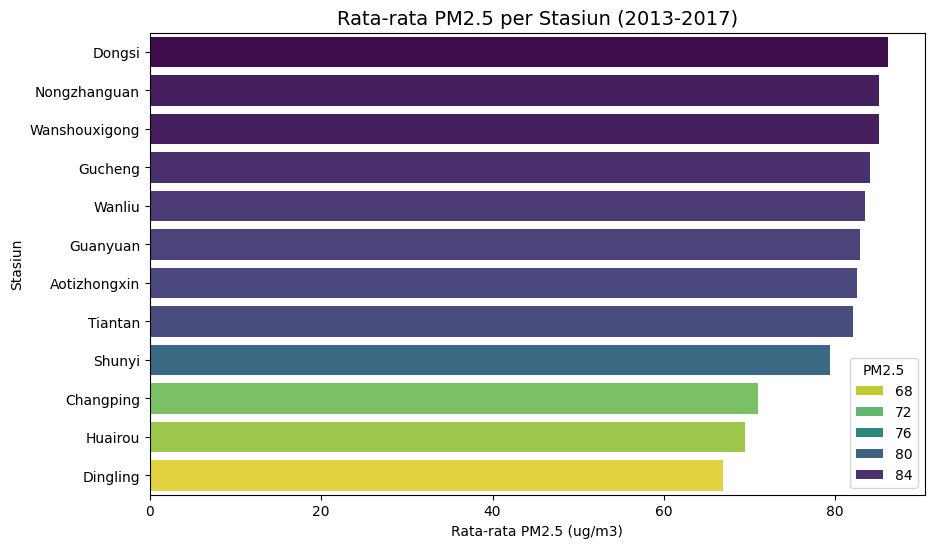

In [7]:
# Visualisasi rata-rata PM2.5 per stasiun menggunakan barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=station_stats['PM2.5'], y=station_stats.index, palette='viridis_r', hue=station_stats['PM2.5'], order=station_stats.index)
plt.title('Rata-rata PM2.5 per Stasiun (2013-2017)', fontsize=14)
plt.xlabel('Rata-rata PM2.5 (ug/m3)')
plt.ylabel('Stasiun')
plt.show()

### Pertanyaan 2: Bagaimana tren kualitas udara dari tahun ke tahun?

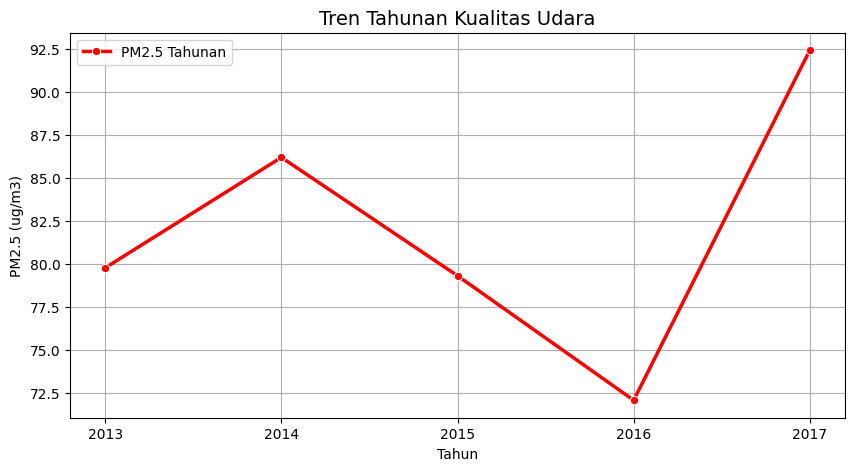

In [8]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_stats, x='year_num', y='PM2.5', marker='o', linewidth=2.5, color='red', label='PM2.5 Tahunan')
plt.title('Tren Tahunan Kualitas Udara', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('PM2.5 (ug/m3)')
plt.xticks(yearly_stats['year_num'])
plt.grid(True)
plt.show()

**Insight:**

Untuk memudahkan, penyampaian data yang telah dianalisis disajikan dalam bentuk visual

- Untuk menjawab pertanyan pertama, Visualisasi dari stasiun yang memiliki rata-rata kualitas udara terburuk dan terbaik disajikan dengan lebih jelas. Stasiun dengan bar yang lebih panjang merupakan stasiun dengan rata-rata kualitas udara terburuk (**Dongsi**). Sebaliknya Stasiun dengan bar terpendek merupakan stasiun dengan rata-rata kualitas udara terbaik (**Dingling**).
- Untuk menjawab pertanyaan kedua, Visualisasi dari Tren kualitas udara berdasarkan **PM2.5** dari tahun ke tahun terlihat tidak linier (naik-turun). 
- Rata-rata tingkat polusi menurun atau membaik dari tahun 2015 dan 2016 setelah tingkat polusi tercatat cukup tinggi (naik) di tahun 2014.

## Analisis Lanjutan (Opsional)

In [9]:
# Koordinat setiap stasiun
station_coords = {
    'Aotizhongxin': [39.982, 116.397],
    'Changping': [40.217, 116.230],
    'Dingling': [40.292, 116.220],
    'Dongsi': [39.929, 116.417],
    'Guanyuan': [39.929, 116.339],
    'Gucheng': [39.914, 116.184],
    'Huairou': [40.328, 116.628],
    'Nongzhanguan': [39.937, 116.461],
    'Shunyi': [40.127, 116.655],
    'Tiantan': [39.886, 116.407],
    'Wanliu': [39.987, 116.287],
    'Wanshouxigong': [39.878, 116.352]
}

# Data agregasi dari rata-rata PM2.5 per stasiun
avg_pm25 = new_data_df.groupby('station')['PM2.5'].mean().reset_index()

# Membuat peta dasar
m = folium.Map(location=[40.0, 116.4], zoom_start=10)

# Menambahkan marker ke peta
for index, row in avg_pm25.iterrows():
    station = row['station']
    pm_value = row['PM2.5']
    
    # Ambil koordinat stasiun
    if station in station_coords:
        lat, lon = station_coords[station]
        
        if pm_value < 75:
            color = 'green' # baik
        elif pm_value < 85:
            color = 'orange' # sedang
        else:
            color = 'red' # buruk
        
        # CircleMarker
        folium.CircleMarker(
            location=[lat, lon],
            radius=15,
            popup=f"{station}: {pm_value:.2f}",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            tooltip=station
        ).add_to(m)

# Menampilkan peta
m

**Insight**

Tujuan _Geospatial Analysis_ ini adalah:
- Melihat distribusi secara spasial yang lebih mudah dipahami dibandingkan hanya dengan menampilkan tabel atau barplot. Selain itu juga kita dapat melihat jarak antar stasiun.
- Lalu kita dapat mengidentifikasi pola regional yang menjelaskan konsentrasi polusi di area seperti perkotaan.
- Stasiun dengan titik hijau terletak di bagian atas peta. Area tersebut terlihat memiliki kontur pegunungan atau perbukitan. Bisa disimpulkan kondisi geografis yang jauh dari perkotaan atau area industri membuat kualitas udara jauh lebih bersih secara alami.
- Stasiun dengan titik merha dan oranye berada di bagian tengah/selatan peta. Area tersebut memperlihatkan stasiun yang terletak di daerah perkotaan/industri sehingga dapat mempengaruhi kualitas udara yang buruk.
- Visualisasi secara Geospatial ini juga memvalidasi hasil dari bar plot yang sebelumnya dibuat.

## Conclusion

- Kesimpulan dari jawaban pertanyaan 1 adalah:
    - Kita mengetahui rata-rata kualitas udara terbaik dan terburuk berdasarkan nilai 4 polutan utama dari 12 stasiun di kota Beijing. Stasiun dengan rata-rata kualitas udara terburuk atau berada dalam zona merah adalah **Dongsi, Nongzhanguan,** dan **Wanshouxigong** dengan rata-rata tingkat polusi yang tertinggi ada di stasiun **Dongsi** dengan **PM2.5 86.144243**.
    - Dan di sisi lain, stasiun dalam zona hijau adalah **Dingling, Huairou**, dan **Changping**. Dengan rata-rata tingkat polusi yang terendah ada di stasiun **Dingling** dengan **PM2.5 66.845557**.

- Kesimpulan dari jawaban pertanyaan 2 adalah:
    - Rata-rata polusi dari tahun ke tahun terlihat bergerak tidak linier. Namun, secara jangka panjang kualitas udara sebenarnya menunjukkan tren membaik (menurun).
    - Tren perbaikan kualitas udara terlihat di tahun 2015 dan 2016 setelah di tahun sebelumnya sempat mengalami kenaikan.